In [2]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/AbstractDataset/df-Abstract.csv')
df = df.rename(columns={'No': 'ID', 'Title': 'Title', 'Abstract': 'Abstract', 'Subclass_labels': 'cpc_subclass'})
df_Abstract=df[["ID","Title","Abstract","cpc_subclass"]]
df_Abstract= df_Abstract.dropna()
df_Abstract = df_Abstract.reset_index(drop=True)
df_Abstract.head()

,ID,Title,Abstract,cpc_subclass
0,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,['G11B']
1,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,['A41D']
2,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,['A41D']
3,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,['A63B']
4,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,['E03D']


In [3]:
df_Abstract_uspto = df_Abstract[df_Abstract['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_Abstract_uspto

,ID,Title,Abstract,cpc_subclass
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
2000104,US08975581,ion trap,an ion trap comprising a first array of magnet...,['H01J']
2000106,US08976203,wavelength conversion device and image display...,a wavelength conversion device includes an exc...,"['G09G', 'G03B', 'H01S', 'H04N']"
2000107,US08976510,cable assembly and electronic device,an electronic device including an electronic u...,"['H05K', 'H01R']"
2000108,US08976819,circuit and method for metering electricity,a current detection module generates a first c...,"['H04J', 'G01R']"


In [5]:
df_Abstract_uspto["Abstract"]= df_Abstract_uspto["Abstract"].dropna()
df_Abstract_uspto = df_Abstract_uspto.reset_index(drop=True)
df_Abstract_uspto

,ID,Title,Abstract,cpc_subclass
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
595461,US08975581,ion trap,an ion trap comprising a first array of magnet...,['H01J']
595462,US08976203,wavelength conversion device and image display...,a wavelength conversion device includes an exc...,"['G09G', 'G03B', 'H01S', 'H04N']"
595463,US08976510,cable assembly and electronic device,an electronic device including an electronic u...,"['H05K', 'H01R']"
595464,US08976819,circuit and method for metering electricity,a current detection module generates a first c...,"['H04J', 'G01R']"


In [7]:
df_Abstract_uspto=df_Abstract_uspto[:60000]
df_Abstract_uspto

,ID,Title,Abstract,cpc_subclass
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
59995,US07294937,apparatus and method for manufacturing a semic...,a multi layered semiconductor structure with f...,['H01L']
59996,US07262721,methods of and apparatuses for adaptive entrop...,methods and apparatuses are provided for adapt...,['H03M']
59997,US07260826,resource allocation in multi stream ip network...,a resource allocation of multiple compressed a...,['H04N']
59998,US07231525,authentification of data in a digital transmis...,a method of authentification of data sent in a...,"['G06F', 'H04L']"


# preprocessing

In [9]:
def cleantext(df_Abstract_uspto): 
    
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
    
    #remove numbers
    df_Abstract_uspto['cleaned_Abstract_text'] =df_Abstract_uspto['cleaned_Abstract_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'https.*$', "", regex = True)
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("   ", " ", regex = True)
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("  ", " ", regex = True)
   
    return df_Abstract_uspto

df_Abstract_uspto = cleantext(df_Abstract_uspto)
df_Abstract_uspto.head()

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...


In [10]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_Abstract_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...


In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))
df_Abstract_uspto.head()

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...


# divide the dataset

In [12]:
#Divide the dataset into different size
df_Abstract_20K=df_Abstract_uspto[:20000]
df_Abstract_20K

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...
...,...,...,...,...,...,...,...
19995,US07050507,adaptive throughput pulse width modulation com...,a signaling apparatus and system may include a...,['H04L'],a signaling apparatus and system may include a...,signaling may transmitter capable sending stro...,signaling may transmitter capable sending stro...
19996,US07050508,method and system for frequency up conversion ...,a method and system is described wherein a sig...,"['H04B', 'H01Q']",a method and system is described wherein a sig...,signal lower frequency converted higher freque...,signal lower frequency converted higher freque...
19997,US07050509,digital isolation system with hybrid circuit i...,an improved digital capacitive isolation barri...,['H04B'],an improved digital capacitive isolation barri...,improved digital capacitive isolation barrier ...,improved digital capacitive isolation barrier ...
19998,US07050510,open loop diversity technique for systems empl...,when using four transmit antennas conventional...,"['H04B', 'H04L']",when using four transmit antennas conventional...,using four transmit antennas channel coding em...,using four transmit antenna channel coding emp...


In [13]:
New_Sample = df_Abstract_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
59394,US07187658,data transmission apparatus selecting efficien...,a data transmission apparatus is provided for ...,"['G06F', 'H04L']",a data transmission apparatus is provided for ...,transmission provided transmitting received us...,transmission provided transmitting received us...


In [14]:
new_Abstract = str(New_Sample["Lemmatized-Abstract"].iloc[0])
new_Abstract

'transmission provided transmitting received user terminal network destination user terminal executing communication using internet protocol transmission routing table storing relating destination address address network table storing static dynamic network selection unit selecting one network transmission transmits destination based static dynamic transmission enables transmission appropriate network selecting appropriate network based static dynamic network'

# Bertopic for 20k patent

In [19]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=50, 
                  n_components=15, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=18, 
                        min_samples=3, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

#c-TF-IDF
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

#Run Model
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df_Abstract_20K['Lemmatized-Abstract']) 

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-16 10:04:15,958 - BERTopic - Transformed documents to Embeddings
2023-03-16 10:05:31,310 - BERTopic - Reduced dimensionality
2023-03-16 10:05:37,332 - BERTopic - Clustered reduced embeddings


In [38]:
#evaluation

In [21]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_Abstract_20K['Lemmatized-Abstract'],
                          "ID": range(len(df_Abstract_20K['Lemmatized-Abstract'])),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]


# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
coherence_c_nmpi = coherence_model.get_coherence()
print("c_npmi is: ",coherence_c_nmpi)

c_npmi is:  -0.02535478421693999


In [22]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_Abstract_20K['Lemmatized-Abstract'],
                          "ID": range(len(df_Abstract_20K['Lemmatized-Abstract'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5254791000623059


In [23]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_Abstract_20K['Lemmatized-Abstract'],
                          "ID": range(len(df_Abstract_20K['Lemmatized-Abstract'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence_u_mass= coherence_model.get_coherence()
print("u_mass is: ", coherence_u_mass)

u_mass is:  -0.9519794287189162


In [24]:
 topic_model.get_topic_info()

,Topic,Count,Name
0,-1,12970,-1_radio_wireless_receiver_transmit
1,0,400,0_floating_memory_volatile_drain region
2,1,314,1_call_telephone_voice_customer
3,2,233,2_pole_bearing_magnet_shaft
4,3,233,3_key_signature_secure_client
...,...,...,...
128,127,18,127_serial_buffer_stage stage_multiplexer
129,128,18,128_divider_frequency signal_fraction_referenc...
130,129,18,129_ray_two dimensional_radiation_subject
131,130,18,130_latch_multiplexer_circuit input_first seco...


In [25]:
df_Abstract_20K['Bertopic_topics'] = topics
df_Abstract_20K['Bertopic_prob'] = probabilities
#search_topics=df_claim_20K[df_claim_20K['predicted_topic'] == 71]
#search_topics = search_topics.sort_values('predicted_topic_prob', ascending=False)
#search_topics = df_claim_20K.reset_index().rename(columns={'index': 'new_index'})
df_Abstract_20K_topic=df_Abstract_20K[["ID","Title","Abstract", "Lemmatized-Abstract","Bertopic_topics","Bertopic_prob"]]
df_Abstract_20K_topic

,ID,Title,Abstract,Lemmatized-Abstract,Bertopic_topics,Bertopic_prob
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bump formed ele...,-1,0.000000
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,-1,0.000000
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,-1,0.000000
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,13,0.792701
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,-1,0.000000
...,...,...,...,...,...,...
19995,US07050507,adaptive throughput pulse width modulation com...,a signaling apparatus and system may include a...,signaling may transmitter capable sending stro...,-1,0.000000
19996,US07050508,method and system for frequency up conversion ...,a method and system is described wherein a sig...,signal lower frequency converted higher freque...,19,1.000000
19997,US07050509,digital isolation system with hybrid circuit i...,an improved digital capacitive isolation barri...,improved digital capacitive isolation barrier ...,-1,0.000000
19998,US07050510,open loop diversity technique for systems empl...,when using four transmit antennas conventional...,using four transmit antenna channel coding emp...,-1,0.000000


In [26]:
#prediction

In [27]:
# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_Abstract, top_n=num_of_topics); 

# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

for idx, topic_idx in enumerate(similar_topics):
    topic = topic_model.get_topic(topic_idx)
    keywords = ' '.join(str(keyword) for keyword in topic[0])
    print(f"Topic {idx+1}: {keywords}")

The top 3 similar topics are [110, -1, 42], and the similarities are [0.61 0.59 0.58]
Topic 1: broadband 0.633210108438408
Topic 2: radio 0.07932434674277279
Topic 3: ip 0.4174494152288668


In [28]:
topic1 = topic_model.get_topic(110)
topic1

[('broadband', 0.633210108438408),
 ('internet protocol', 0.4845976781781631),
 ('service provider', 0.46726401318755817),
 ('provider', 0.4255115908925961),
 ('telecommunication', 0.4229942041495271),
 ('ethernet', 0.4142093896126045),
 ('internet', 0.3841239303940806),
 ('distinct', 0.3518205637682587),
 ('power line', 0.3402546252899613),
 ('electric power', 0.33853410381178023)]

In [29]:
filter_topics_Bertopic=df_Abstract_20K_topic[df_Abstract_20K_topic['Bertopic_topics'] == 110]
filter_topics_Bertopic = filter_topics_Bertopic.sort_values('Bertopic_prob', ascending=False)
filter_topics_Bertopic = filter_topics_Bertopic.reset_index().rename(columns={'index': 'new_index'})
filter_topics_Bertopic

,new_index,ID,Title,Abstract,Lemmatized-Abstract,Bertopic_topics,Bertopic_prob
0,921,US07035392,unique repository server in an operations and ...,the invention relates to an operations and mai...,relates operation maintenance center telecommu...,110,1.000000
1,8054,US07002995,broadband network with enterprise wireless com...,the present invention sets forth a network cen...,present set forth network centric service dist...,110,1.000000
2,18068,US07043250,systems and methods for forming and operating ...,methods are provided for forming and operating...,method provided forming operating mesh communi...,110,1.000000
3,18008,US07043197,telecommunication system for the bidirectional...,telecommunication system for bidirectional tra...,telecommunication bidirectional transmission v...,110,1.000000
4,16737,US07039041,operational support system for telecommunicati...,an operational support system includes a group...,operational support group legacy telephony com...,110,1.000000
5,16269,US07038138,network communications system,a network communications system is provided fo...,network communication provided allowing group ...,110,1.000000
6,15966,US07031747,internet protocol multimedia subsystem compone...,an apparatus in one example comprises a servin...,one comprises serving mobile switching center ...,110,1.000000
7,12538,US07020136,satellite telecommunication system with storag...,telecommunications system particularly for exc...,telecommunication particularly exchanging tele...,110,1.000000
8,9950,US07010002,broadband network with enterprise wireless com...,the present invention sets forth a network cen...,present set forth network centric service dist...,110,1.000000
9,8976,US07006479,system and method of a wireless network operat...,a wireless office communication system includi...,wireless office communication multi protocol w...,110,1.000000


In [30]:
#caculate the similarity between docs and new Abstract

In [31]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Load the pre-trained model
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encode the documents in the dataset
document_embeddings = sbert_model.encode(filter_topics_Bertopic['Lemmatized-Abstract'])

# Encode the new sample
document_embeddings = np.vstack(document_embeddings)
new_sample_embedding = sbert_model.encode([new_Abstract])

# Compute cosine similarity scores
cos_similarities = cosine_similarity(document_embeddings, new_sample_embedding)
filter_topics_Bertopic['cosine_similarity_BERTopic'] = cos_similarities.flatten()


# Compute euclidean distances
#euc_distances = euclidean_distances(document_embeddings, new_sample_embedding)
#search_topics['euclidean_distance'] = euc_distances.flatten()

# Sort by cosine similarity and display the top results
#search_topics.sort_values('cosine_similarity_BERTopic', ascending=False, inplace=True)

In [32]:
filter_topics_Bertopic

,new_index,ID,Title,Abstract,Lemmatized-Abstract,Bertopic_topics,Bertopic_prob,cosine_similarity_BERTopic
0,921,US07035392,unique repository server in an operations and ...,the invention relates to an operations and mai...,relates operation maintenance center telecommu...,110,1.000000,0.576771
1,8054,US07002995,broadband network with enterprise wireless com...,the present invention sets forth a network cen...,present set forth network centric service dist...,110,1.000000,0.721842
2,18068,US07043250,systems and methods for forming and operating ...,methods are provided for forming and operating...,method provided forming operating mesh communi...,110,1.000000,0.612392
3,18008,US07043197,telecommunication system for the bidirectional...,telecommunication system for bidirectional tra...,telecommunication bidirectional transmission v...,110,1.000000,0.577528
4,16737,US07039041,operational support system for telecommunicati...,an operational support system includes a group...,operational support group legacy telephony com...,110,1.000000,0.693112
5,16269,US07038138,network communications system,a network communications system is provided fo...,network communication provided allowing group ...,110,1.000000,0.574294
6,15966,US07031747,internet protocol multimedia subsystem compone...,an apparatus in one example comprises a servin...,one comprises serving mobile switching center ...,110,1.000000,0.812646
7,12538,US07020136,satellite telecommunication system with storag...,telecommunications system particularly for exc...,telecommunication particularly exchanging tele...,110,1.000000,0.596311
8,9950,US07010002,broadband network with enterprise wireless com...,the present invention sets forth a network cen...,present set forth network centric service dist...,110,1.000000,0.747768
9,8976,US07006479,system and method of a wireless network operat...,a wireless office communication system includi...,wireless office communication multi protocol w...,110,1.000000,0.802078


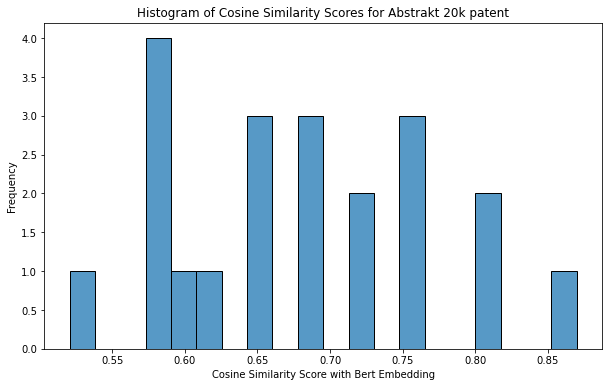

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_Bertopic['cosine_similarity_BERTopic']

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20)
plt.title('Histogram of Cosine Similarity Scores for Abstrakt 20k patent')
plt.xlabel('Cosine Similarity Score with Bert Embedding')
plt.ylabel('Frequency')
plt.show()

In [34]:
#get the most similar doc in dataset to query

In [35]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_Bertopic = filter_topics_Bertopic.sort_values(by=['cosine_similarity_BERTopic'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_Bertopic.iloc[0]['Abstract']

most_similar_doc

'a modem that includes a configuration domain name associated with a configuration broadband service node bsn is firstly provided a pppoe session is established and an authentication request is transmitted containing the identifier and a generic password from the modem to a single configuration domain name over the pppoe network authorization is then received from the configuration domain name the authorization preferably comprises a temporary dynamic internet protocol ip address full configuration details including a static ip address are then obtained from an internet service provider isp the invention also provides a system and computer program product for provisioning broadband service in a point to point protocol over ethernet pppoe network'

In [36]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_Bertopic = filter_topics_Bertopic.sort_values(by=['cosine_similarity_BERTopic'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_Bertopic.iloc[0]['Lemmatized-Abstract']

most_similar_doc

'modem configuration domain name associated configuration broadband service node bsn firstly provided pppoe session established authentication request transmitted identifier generic password modem single configuration domain name pppoe network authorization received configuration domain name authorization preferably comprises temporary dynamic internet protocol ip address full configuration detail static ip address obtained internet service provider isp provides computer program product provisioning broadband service point point protocol ethernet pppoe network'

In [37]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_Bertopic = filter_topics_Bertopic.sort_values(by=['cosine_similarity_BERTopic'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_Bertopic.iloc[0]['ID']

most_similar_doc

'US07047304'